In [29]:
import pandas as pd
import numpy as np
import random

from scipy.stats import truncnorm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

from IPython.display import Markdown as md

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

from utils import create_dataset

## General Idea
We travel back in time to 2010. The video game 'Fallout: New Vegas' has just been realsed and you're excited to start palying. You load up the game and are present with a character creation page. At this point, you need to choose which of the S.P.E.C.I.A.L. attributes (see below) you want your character to possess. This involves assigning 50 points to the different attributes. The more points you assign to a specific attribube, the more of that ability you're character possesses.

You're friends have already had the game for two weeks and are far into the game. You want to catch up, but don't want to spend time figuring out what the "optimum" player stats are for the game. So, as a resourcful data scientist, you are going to use linear regression to build a model that will test different character builds so that you can find the best one for the game.

As a class we are going to select the "optimum" player stats for the game, and construct a dummy dataset that reflects this choice. Then, the other two presenters with use the LR techniques to build a model and find the best set up for the game.


## S.P.E.C.I.A.L. Attributes

- #### Strength
    - Measures your raw physical power. Affects damage of all melee attacks.
- #### Perception
    - Your sense of environmental awareness. How easily you can deteck enemies.
- #### Endurance
    - Measures your overall physical fitness. Determines how far and fast you can run.
- #### Charisma
    - Your ability to influence other people. Gain allies easier and get better prices.
- #### Intelligence
    - Measures your overall mental aptitude. Affects the durability of crafted items and the difficulty of hacking.
- #### Agility
    - Measures your overall finesse and reflexes. Affects jump and sneak abilities.
- #### Luck
    - Measures your general good fortune. Affects chance of critical hits and finding valuable items.


### Class chooses which stats are most important 
They do this by assigning points to each category. There are a total of 50 points to split.

In [68]:
# Player S.P.E.C.I.A.L. Attributes
optimum_stats = {
    'Strength' : 15,
    'Perception' : 2,
    'Endurance' : 7,
    'Charisma' : 1,
    'Intelligence' : 10,
    'Agility' : 0,
    'Luck' : 15
}
print(f"{50 - sum(optimum_stats.values())} Points Remaining")

0 Points Remaining


In [69]:
data = create_dataset(optimum_stats)
data

,Strength,Perception,Endurance,Charisma,Intelligence,Agility,Luck,Rating
0,6.0,11.0,5.0,9.0,6.0,7.0,7.0,45.922369
1,8.0,9.0,6.0,6.0,10.0,4.0,6.0,54.882349
2,9.0,9.0,8.0,5.0,6.0,10.0,7.0,52.642341
3,10.0,5.0,7.0,6.0,7.0,4.0,5.0,59.131533
4,8.0,12.0,7.0,9.0,5.0,7.0,3.0,45.361499
...,...,...,...,...,...,...,...,...
995,4.0,7.0,9.0,10.0,9.0,8.0,4.0,46.364311
996,5.0,4.0,7.0,6.0,9.0,7.0,10.0,60.092242
997,9.0,12.0,6.0,5.0,9.0,4.0,4.0,54.830155
998,5.0,5.0,8.0,8.0,8.0,9.0,5.0,50.758155


## Visualise Data

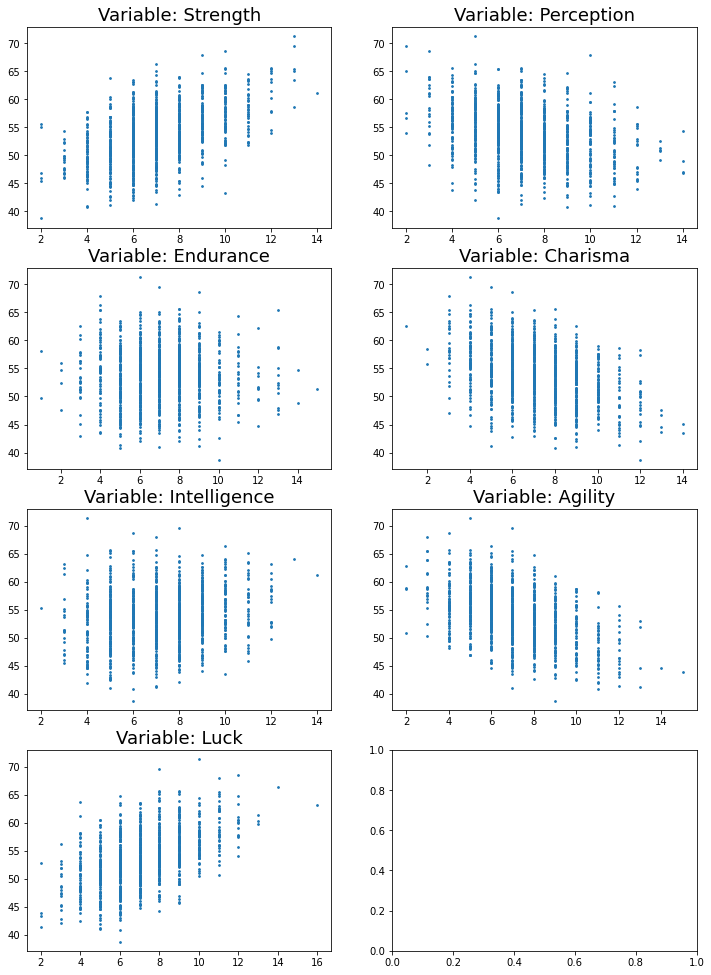

In [70]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 17))
axes = axes.flatten()
for i, predictor in enumerate(data.columns[:-1]):
    axes[i].scatter(data[predictor], data['Rating'], s=3)
    axes[i].set_title(f'Variable: {predictor}', fontsize=18)

## Fit an exploratory Model

In [71]:
model = smf.ols('Rating~Strength+Perception+Endurance+Charisma+Intelligence+Agility+Luck', data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     949.5
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:03:10   Log-Likelihood:                -2001.3
No. Observations:                1000   AIC:                             4019.
Df Residuals:                     992   BIC:                             4058.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       55.4132      1.346     41.171      0.000      52.772      58.054
Strength         1.0411      0.036     28.615      0.000       0.970       1.112
Perception      -0.7125      0.035    -20.265      0.000      -0.781      -0.643
Endurance       -0.0624      0.036     -1.740      0.082      -0.133       0.008
Charisma        -0.8494      0.036    -23.309      0.000      -0.921      -0.778
Intelligence     0.3383      0.036      9.300      0.000       0.267       0.410
Agility         -0.9837      0.036    -27.246      0.000      -1.055      -0.913
Luck             0.9942      0.037     26.901      0.000       0.922       1.067
==============================================================================
Omnibus:                        4.403   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.448
Skew:                          -0.147   Prob(JB):                        0.108
Kurtosis:                       2.856   Cond. No.                         449.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***
## Model Diagnostic and Model Adjustment

>**Data structure problem**
>   - Multicolliearity
>   - Influential points
>   
>**Assumptions for linear regression model**
>   - OLSE method requires $\epsilon$ has a constant variance --> heteroscedasiticity
>   - Although OLSE still has "BLUE" estimation for parameters, normality is needed to perform t-test, C.I. and ANOVA test --> non-normality residuals

## Check for Multicolinearity

In [72]:
## multicollinearity: VIF
y, X = dmatrices('Rating~Strength+Perception+Endurance+Charisma+Intelligence+Agility+Luck', data=data, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor      features
0  560.735754     Intercept
1    1.680442      Strength
2    1.701600    Perception
3    1.696050     Endurance
4    1.758600      Charisma
5    1.642843  Intelligence
6    1.662842       Agility
7    1.696719          Luck


<div class="alert alert-block alert-success">
<b>Interpretation:</b> All the VIF (Variance Inflation Factor) are around 1, which means there is no significant multicollinearity problem in our model.
</div>

## Check Residuals for Heteroscedasticity

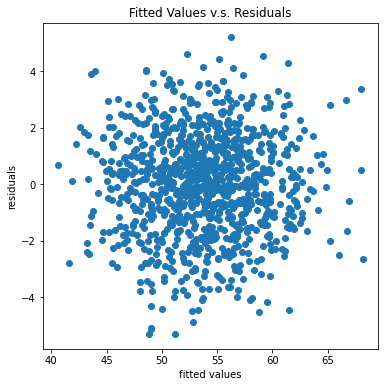

In [73]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(model.fittedvalues, model.resid)
ax.set_xlabel('fitted values')
ax.set_ylabel('residuals')
ax.set_title('Fitted Values v.s. Residuals')
plt.show()

<div class="alert alert-block alert-success">
<b>Interpretation:</b> According to the plot, there is no obvious change in bandwidth of residuals. So we think there isn't significant heteroscedasticity in our model.
</div>

## Plot QQ diagram to check Normality Condition

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


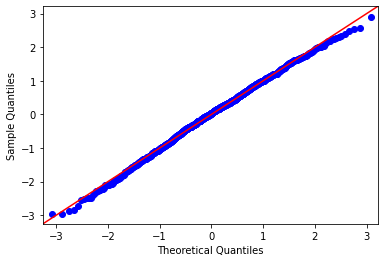

In [74]:
## check normality for residuals --> QQ plots
sm.qqplot(model.resid, line='45', fit=True);

<div class="alert alert-block alert-success">
<b>Interpretation:</b> In our QQ-plot, there is no obvious deviation from "y=x" line. So we think there is no violation for normality assumption.
</div>

## Check for Influential Points

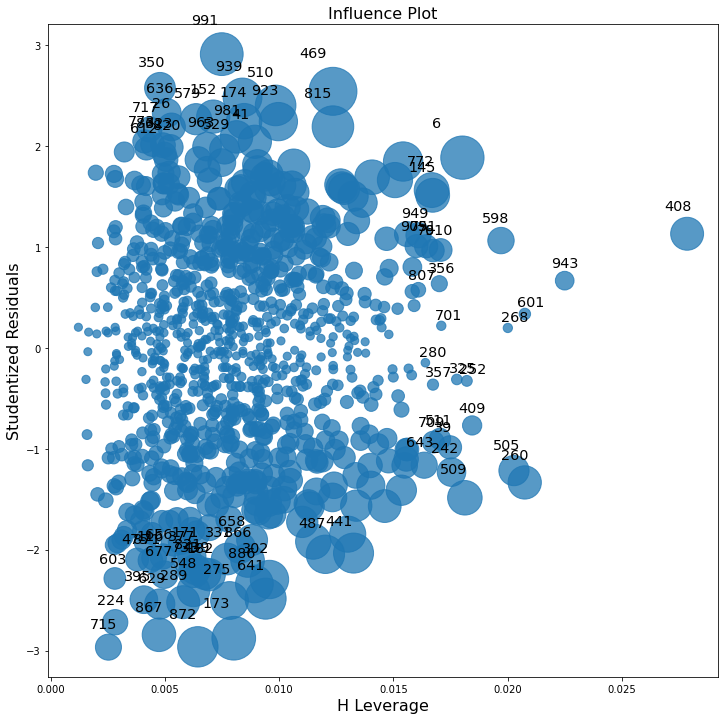

In [75]:
## influential points
fig, ax = plt.subplots(figsize=(12,12))
fig=sm.graphics.influence_plot(model,ax=ax, criterion="cooks") 
plt.show()

In [76]:
from scipy import stats

n = len(data)
p = 8
sse = np.sum((model.fittedvalues-data.Rating)**2)
mse = sse/(n-p)
res = model.resid

X = pd.DataFrame([np.ones((len(data))), data['Strength'], data['Perception'], data['Endurance'], data['Charisma'], \
                 data['Intelligence'], data['Agility'], data['Luck']], ).T
H = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)
critical_value = stats.t.ppf(1-0.05/2, df=n-p-1)

influential_cook = []
for i in range(n):
    cook_dis = (res[i]**2/(p*mse))*(H.iloc[i,i]/((1-H.iloc[i,i])**2))
    if cook_dis > 4/n:
        influential_cook.append([i, cook_dis])
        
influential_cook = pd.DataFrame(influential_cook, columns=['observation_num', "cook's distance"])
influential_cook.sort_values("cook's distance", ascending=False)


,observation_num,cook's distance
23,469,0.010072
8,173,0.008300
0,6,0.008151
45,991,0.007948
35,815,0.007503
30,641,0.007294
27,510,0.007156
38,872,0.007059
21,441,0.006921
44,988,0.006678


In [77]:
md('<div class="alert alert-block alert-warning"><b>Interpretation:</b> We used Cook\'s Distance to distinguish influential points. There are {} influential points in our dataset. Later we can try to delete them to get a better performance of our model.</div>'.format(len(influential_cook)))

<div class="alert alert-block alert-warning"><b>Interpretation:</b> We used Cook's Distance to distinguish influential points. There are 46 influential points in our dataset. Later we can try to delete them to get a better performance of our model.</div>

## Remove Erroneous Points

<div class="alert alert-block alert-info">
<b>Based on our diagnostic above, we think there's only influential points problem. Next let's try to get rid of those influential points and see whether our model would perform better!</b> 
</div>

In [78]:
data_clean = data.drop(influential_cook['observation_num'], axis=0)
data_clean = data_clean.reset_index(drop=True)
model_clean = smf.ols('Rating~Strength+Perception+Endurance+Charisma+Intelligence+Agility+Luck', data_clean).fit()
model_clean.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     1017.
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:06:08   Log-Likelihood:                -1822.6
No. Observations:                 954   AIC:                             3661.
Df Residuals:                     946   BIC:                             3700.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       55.5003      1.263     43.958      0.000      53.023      57.978
Strength         1.0309      0.034     30.186      0.000       0.964       1.098
Perception      -0.7100      0.033    -21.410      0.000      -0.775      -0.645
Endurance       -0.0497      0.034     -1.473      0.141      -0.116       0.016
Charisma        -0.8454      0.034    -24.576      0.000      -0.913      -0.778
Intelligence     0.3310      0.034      9.623      0.000       0.264       0.399
Agility         -0.9756      0.034    -28.700      0.000      -1.042      -0.909
Luck             0.9746      0.035     28.079      0.000       0.906       1.043
==============================================================================
Omnibus:                        6.658   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                5.958
Skew:                          -0.135   Prob(JB):                       0.0508
Kurtosis:                       2.723   Cond. No.                         450.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
print('The adjusted R square of the original model = ', round(model.rsquared_adj, 4))
print('The adjusted R square of the new model after deleting influential points = ', round(model_clean.rsquared_adj, 4))

The adjusted R square of the original model =  0.8692
The adjusted R square of the new model after deleting influential points =  0.8818


---

In [80]:
for k, v in optimum_stats.items():
    print(k,v)

Strength 15
Perception 2
Endurance 7
Charisma 1
Intelligence 10
Agility 0
Luck 15


In [8]:
X = np.array([1] + list(optimum_stats.values()))
coeffs = model.params.values

print(f"Our optimum player rating: {round(X @ coeffs, 1)}")

Our optimum player rating: 90.2


This player rating is higher than any in out dataset

In [9]:
data[['Rating']].sort_values('Rating', ascending=False).head(5)

,Rating
866,71.347000
291,70.914089
994,68.921827
472,68.168194
61,68.137212


## Use this model to test other character types

We can use this fitted Linear Regression model to test different character types that we want to play with to see which is the best

In [81]:
def get_predictor(coeffs):
    def predictor(stats):
        X = np.array([1] + list(stats.values()))
        return round(X @ coeffs,2)
    return predictor

coeffs = model_clean.params.values
predictor = get_predictor(coeffs)

In [82]:
assassin_stats = {
    'Strength' : 3,
    'Perception' : 7,
    'Endurance' : 4,
    'Charisma' : 9,
    'Intelligence' : 12,
    'Agility' : 11,
    'Luck' : 4
}

assassin_rating = predictor(assassin_stats)
print(f"Player Rating: {assassin_rating}")

Player Rating: 42.95


## Assassin Character
Stealth characters are often charming, intelligent. They need to rely on being nimble and out of sight to survive.

## Warrior Character
Warrior characters don't care about being subtle. They use they're brute strength to defeat their enemies.

In [83]:
warrior_stats = {
    'Strength' : 17,
    'Perception' : 8,
    'Endurance' : 13,
    'Charisma' : 0,
    'Intelligence' : 1,
    'Agility' : 5,
    'Luck' : 2
}

warrior_rating = predictor(warrior_stats)
print(f"Player Rating: {warrior_rating}")

Player Rating: 64.1


## Conclusion


In [84]:
if warrior_rating > assassin_rating:
    msg = f"The warrior player rating is higher than the Assassin! Pack away the sniper, it's time to charge in head on!"
else:
    msg = f"The Assassin player rating is highter than the Warrior! Hold on, time to get sneaky!"
    
md('<div class="alert alert-block alert-info"><b>Conclusion: </b>{}</div>'.format(msg))

<div class="alert alert-block alert-info"><b>Conclusion: </b>The warrior player rating is higher than the Assassin! Pack away the sniper, it's time to charge in head on!</div>